### initialize a config

In [1]:
import matplotlib
%matplotlib widget
import amadeusgpt
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
from amadeusgpt.programs.task_program_registry import TaskProgramLibrary
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

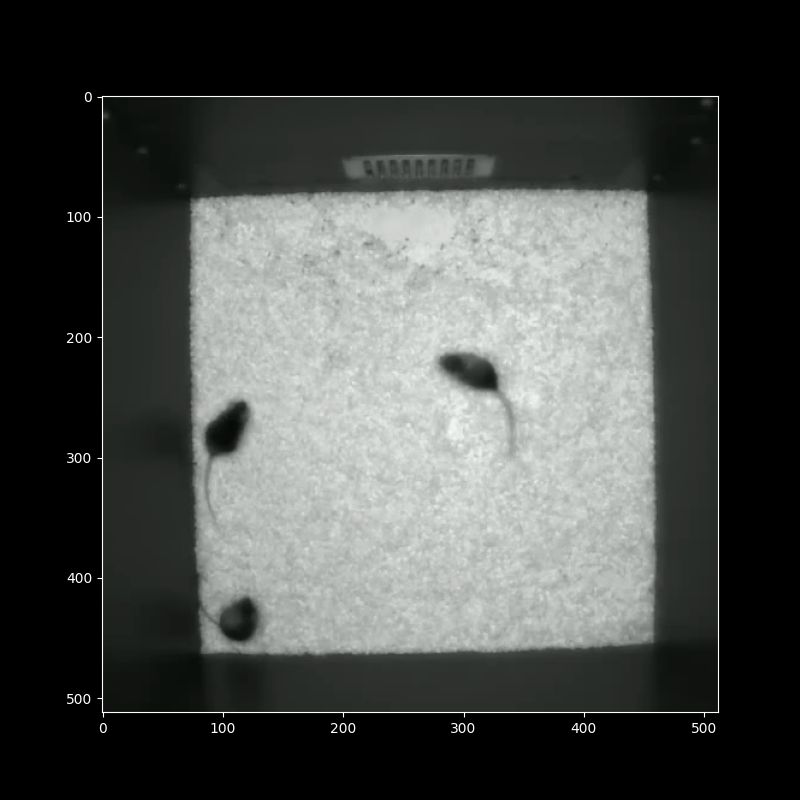

In [2]:
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/MABe_template.yaml")
config['keypoint_info']['keypoint_file_path'] = str(amadeus_root / config['keypoint_info']['keypoint_file_path'])
config['video_info']['video_file_path'] = str(amadeus_root / config['video_info']['video_file_path'])
cap = cv2.VideoCapture(config['video_info']['video_file_path'])

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, config['video_info']['scene_frame_number'])
    # Read the frame
    ret, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(image)
plt.show()

### Register a new task program into the library

In [3]:
@TaskProgramLibrary.register_task_program(creator="human")
def get_approach_events(config):
    """
    This task program describes the approach events between any pair of two animals.
    """
    # behavior_analysis was defined in the namespace. Just take this as syntax
    analysis = behavior_analysis    
    orientation_events = analysis.event_manager.get_animals_animals_events(['relative_head_angle <= 30'])
                                                                

    close_events = analysis.event_manager.get_animals_animals_events(['distance < 300', 'relative_speed > 0.0'])

        
    speed_events = analysis.event_manager.get_animals_state_events("speed > 0.1")


    close_speed_events = analysis.event_manager.get_composite_events(close_events,
                                                                    speed_events,
                                                                    "logical_and")
    
    approach_events = analysis.event_manager.get_composite_events(close_speed_events,
                                                                    orientation_events,
                                                                    "logical_and")
    
  
    return approach_events

In [4]:
@TaskProgramLibrary.register_task_program(creator="human")
def get_corner_events(config):
    # behavior_analysis is already defined in the namespace
    analysis = behavior_analysis    
    roi0_events = analysis.event_manager.get_animals_object_events('ROI0', 'overlap==True')
    roi1_events = analysis.event_manager.get_animals_object_events('ROI1', 'overlap==True')
    roi2_events = analysis.event_manager.get_animals_object_events('ROI2', 'overlap==True')
    roi3_events = analysis.event_manager.get_animals_object_events('ROI3', 'overlap==True')
    roi0_or_1_events = analysis.event_manager.get_composite_events(roi0_events, roi1_events, 'logical_or')
    roi2_or_3_events = analysis.event_manager.get_composite_events(roi2_events, roi3_events, 'logical_or')
    corner_events = analysis.event_manager.get_composite_events(roi0_or_1_events, roi2_or_3_events, 'logical_or')
    return corner_events

In [5]:
amadeus = AMADEUS(config)
analysis = amadeus.get_analysis()

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0 $
current total tokens 544
The image shows a top-down view of a small enclosure with three small animals inside. The animals appear to be mice, as indicated by their size, shape, and tails. The background is a textured surface, likely bedding material, and there is a vent or grate visible at the top of the enclosure.

Here is the filled json string based on the image:

```json
{
    "description": "Top-down view of an enclosure with three mice on a textured surface.",
    "individuals": 3,
    "species": "topview_mouse",
    "background_objects": ["vent", "bedding material"]
}
```


In [6]:
from IPython.display import Markdown, display
from IPython.display import Video
def parse_result(qa_message):
    code = f"```python\n{qa_message['code']}\n```"
    display(Markdown(code))
    print (f'videos generated to {qa_message["out_videos"]}')
    print ('Open it with media player if it does not properly display in the notebook')
    if qa_message['out_videos'] is not None:
        for video_path in qa_message['out_videos']:
            display(Video(video_path, embed=True))
    display(Markdown(str(qa_message['function_rets'])))



```python
def get_approach_events(config):
    analysis = behavior_analysis
    orientation_events = analysis.event_manager.get_animals_animals_events(['relative_head_angle <= 30'])
    close_events = analysis.event_manager.get_animals_animals_events(['distance < 300', 'relative_speed > 0.0'])
    speed_events = analysis.event_manager.get_animals_state_events('speed > 0.1')
    close_speed_events = analysis.event_manager.get_composite_events(close_events, speed_events, 'logical_and')
    approach_events = analysis.event_manager.get_composite_events(close_speed_events, orientation_events, 'logical_and')
    return approach_events
```

videos generated to ['results/EGS8X2MN4SSUGFWAV976_get_approach_events_video_0.mp4']
Open it with media player if it does not properly display in the notebook


[<amadeusgpt.analysis_objects.event.Event object at 0x29d0eeb90>]

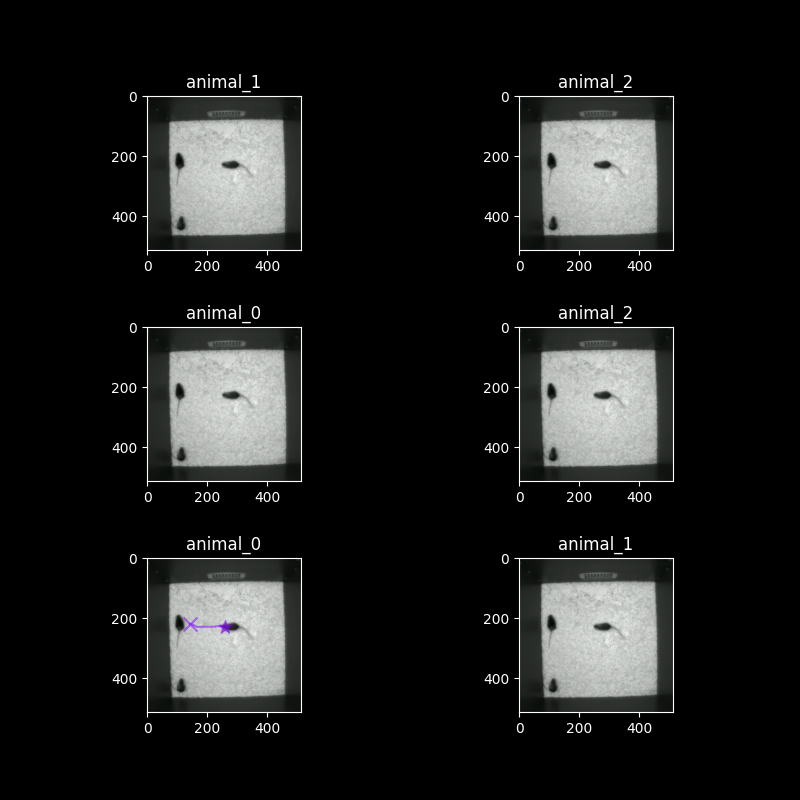

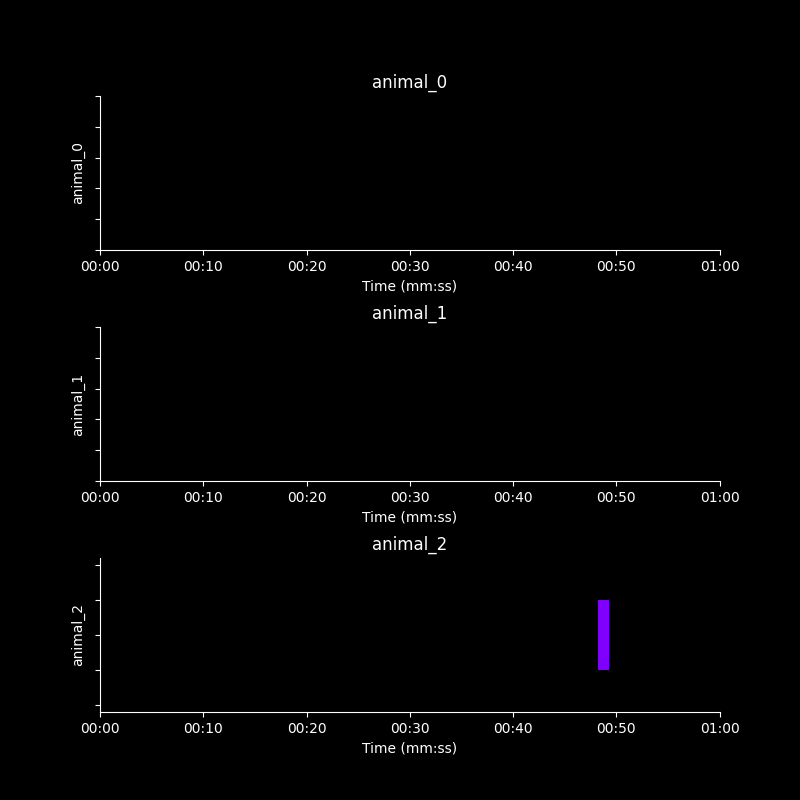

In [7]:
qa_message = amadeus.run_task_program(config, 'get_approach_events')
parse_result(qa_message)

In [8]:
amadeus.save_results()

In [9]:
amadeus.load_results()